In [84]:
# Libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [2]:
# Importing data
Train = pd.read_csv('TrainScaled.csv').drop(columns='Unnamed: 0')
Test = pd.read_csv('TestScaled.csv').drop(columns='Unnamed: 0')
Train.head()

,gdp_per_capita ($),gdp_for_year ($),age,sex,generation,population-1,suicides_no-1,country,year,suicideRate
0,-0.587214,-0.157569,0.228086,0.823055,0.126435,0.247609,0.020860,Argentina,2010,7.831615
1,-0.915488,-0.344502,0.228086,0.823055,0.126435,-0.446805,-0.407847,Armenia,2010,2.727723
2,1.005540,-0.171885,0.228086,-1.214986,0.126435,-0.340891,-0.222342,Austria,2010,15.862616
3,0.209667,-0.344125,0.228086,0.823055,0.126435,-0.494388,-0.414965,Bahamas,2010,2.995187
4,-0.112472,-0.337079,0.228086,-1.214986,0.126435,-0.478974,-0.410422,Bahrain,2010,1.667896


In [3]:
# Dividing into X and Y
yTrain =  Train['suicideRate'].copy()
yTest =  Test['suicideRate'].copy()
XTrain = Train.drop(columns='suicideRate').copy()
XTest = Test.drop(columns='suicideRate').copy()
XTrain.head()

,gdp_per_capita ($),gdp_for_year ($),age,sex,generation,population-1,suicides_no-1,country,year
0,-0.587214,-0.157569,0.228086,0.823055,0.126435,0.247609,0.020860,Argentina,2010
1,-0.915488,-0.344502,0.228086,0.823055,0.126435,-0.446805,-0.407847,Armenia,2010
2,1.005540,-0.171885,0.228086,-1.214986,0.126435,-0.340891,-0.222342,Austria,2010
3,0.209667,-0.344125,0.228086,0.823055,0.126435,-0.494388,-0.414965,Bahamas,2010
4,-0.112472,-0.337079,0.228086,-1.214986,0.126435,-0.478974,-0.410422,Bahrain,2010


In [4]:
# Parameters
trainCountries = len(XTrain['country'].unique())
testCountries = len(XTest['country'].unique())
times = len(XTrain['year'].unique())
variables = len(XTrain.drop(columns=['year', 'country']).columns)
print(trainCountries, testCountries, times, variables)

52 23 4 7


In [5]:
# Reshaping X
idTrain = XTrain[['country', 'year']].copy()
idTest = XTest[['country', 'year']].copy()
XTrain = np.reshape(XTrain.drop(columns=['country', 'year']), (trainCountries, times, variables))
XTest = np.reshape(XTest.drop(columns=['country', 'year']), (testCountries, times, variables))
XTrain[0]

array([[-0.58721433, -0.15756899,  0.22808578,  0.82305489,  0.12643493,
         0.24760898,  0.02085991],
       [-0.91548779, -0.34450159,  0.22808578,  0.82305489,  0.12643493,
        -0.44680453, -0.40784728],
       [ 1.00554006, -0.17188539,  0.22808578, -1.21498579,  0.12643493,
        -0.3408907 , -0.22234169],
       [ 0.20966706, -0.34412469,  0.22808578,  0.82305489,  0.12643493,
        -0.49438803, -0.41496464]])

In [6]:
# Rehsaping Y
yTrain = np.reshape(yTrain, (trainCountries, times, 1))
yTest = np.reshape(yTest, (testCountries, times, 1))
yTrain[0]

array([[ 7.83161543],
       [ 2.72772282],
       [15.86261569],
       [ 2.99518673]])

Im creating 3 architectures for modeling: LSTM, GRU and a mix of them. Before modelling, a weights initializer will be set for all RNN.

In [7]:
initializer = keras.initializers.GlorotNormal(seed=1234)

In [106]:
# LSTM
LSTM = keras.models.Sequential()
LSTM.add(keras.layers.LSTM(units=100, input_shape=(times, variables), kernel_initializer=initializer,
                          return_sequences=True))
LSTM.add(keras.layers.LSTM(units=100, input_shape=(times, variables), kernel_initializer=initializer,
                          return_sequences=False))
LSTM.add(keras.layers.Dense(units=1, activation='linear'))
LSTM.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_34 (LSTM)              (None, 4, 100)            43200     
                                                                 
 lstm_35 (LSTM)              (None, 100)               80400     
                                                                 
 dense_28 (Dense)            (None, 1)                 101       
                                                                 
Total params: 123,701
Trainable params: 123,701
Non-trainable params: 0
_________________________________________________________________


When Return sequences is True, the LSTM layer return a matrix which each row represent a unique observation and each column is its fitter value for each time setted (4 in this case). When this parameter is false, the layer only returns a vector with the fitted value for the last time (t4 in this case) for each observaton.

In [107]:
# Training
LSTM.compile(loss='mean_squared_error', optimizer='adam')
historyLSTM = LSTM.fit(XTrain, yTrain, validation_data=(XTest, yTest), epochs=60, batch_size=50)

Epoch 1/60
2/2 [==============================] - 3s 791ms/step - loss: 183.6420 - val_loss: 196.8863
Epoch 2/60
2/2 [==============================] - 0s 73ms/step - loss: 182.8598 - val_loss: 196.2625
Epoch 3/60
2/2 [==============================] - 0s 140ms/step - loss: 182.1211 - val_loss: 195.3058
Epoch 4/60
2/2 [==============================] - 0s 115ms/step - loss: 181.2487 - val_loss: 194.0986
Epoch 5/60
2/2 [==============================] - 0s 76ms/step - loss: 180.2991 - val_loss: 192.7084
Epoch 6/60
2/2 [==============================] - 0s 89ms/step - loss: 179.1286 - val_loss: 191.1575
Epoch 7/60
2/2 [==============================] - 0s 35ms/step - loss: 177.7761 - val_loss: 189.2903
Epoch 8/60
2/2 [==============================] - 0s 82ms/step - loss: 176.1093 - val_loss: 186.9871
Epoch 9/60
2/2 [==============================] - 0s 91ms/step - loss: 174.0581 - val_loss: 184.4086
Epoch 10/60
2/2 [==============================] - 0s 28ms/step - loss: 171.5955 - val_l

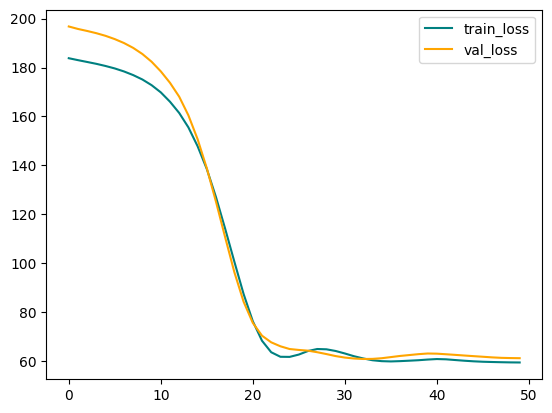

In [97]:
# Plotting loss
plt.plot(historyLSTM.history['loss'], color='teal', label='train_loss')
plt.plot(historyLSTM.history['val_loss'], color='orange', label='val_loss')
plt.legend(loc='best')
plt.show()

In [60]:
# GRU
GRU = keras.models.Sequential()
GRU.add(keras.layers.GRU(units=100, input_shape=(times, variables), kernel_initializer=initializer,
                          return_sequences=True))
GRU.add(keras.layers.GRU(units=100, input_shape=(times, variables), kernel_initializer=initializer,
                          return_sequences=False))
GRU.add(keras.layers.Dense(units=1, activation='linear'))
GRU.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_18 (GRU)                (None, 4, 100)            32700     
                                                                 
 gru_19 (GRU)                (None, 100)               60600     
                                                                 
 dense_16 (Dense)            (None, 1)                 101       
                                                                 
Total params: 93,401
Trainable params: 93,401
Non-trainable params: 0
_________________________________________________________________


In [61]:
# Training
GRU.compile(loss='mean_squared_error', optimizer='adam')
historyGRU = GRU.fit(XTrain, yTrain, validation_data=(XTest, yTest), epochs=50, batch_size=50)

Epoch 1/50
2/2 [==============================] - 2s 550ms/step - loss: 183.9934 - val_loss: 197.0892
Epoch 2/50
2/2 [==============================] - 0s 96ms/step - loss: 181.8896 - val_loss: 195.2042
Epoch 3/50
2/2 [==============================] - 0s 78ms/step - loss: 180.1474 - val_loss: 193.4419
Epoch 4/50
2/2 [==============================] - 0s 62ms/step - loss: 178.3001 - val_loss: 191.5882
Epoch 5/50
2/2 [==============================] - 0s 48ms/step - loss: 176.1884 - val_loss: 189.3776
Epoch 6/50
2/2 [==============================] - 0s 55ms/step - loss: 173.7187 - val_loss: 186.6492
Epoch 7/50
2/2 [==============================] - 0s 41ms/step - loss: 170.7275 - val_loss: 183.2581
Epoch 8/50
2/2 [==============================] - 0s 36ms/step - loss: 166.9997 - val_loss: 178.9385
Epoch 9/50
2/2 [==============================] - 0s 37ms/step - loss: 162.3945 - val_loss: 173.6272
Epoch 10/50
2/2 [==============================] - 0s 43ms/step - loss: 156.8114 - val_los

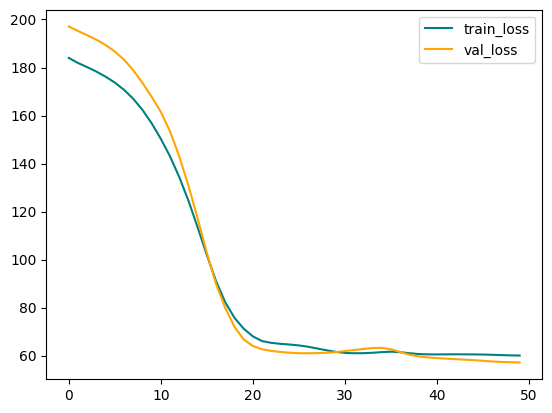

In [108]:
# Plotting loss
plt.plot(historyGRU.history['loss'], color='teal', label='train_loss')
plt.plot(historyGRU.history['val_loss'], color='orange', label='val_loss')
plt.legend(loc='best')
plt.show()

In [139]:
# Mix of layers
GRULSTM = keras.models.Sequential()
GRULSTM.add(keras.layers.GRU(units=50, kernel_initializer=initializer,
                             return_sequences=True))
GRULSTM.add(keras.layers.GRU(units=50, input_shape=(times, variables), kernel_initializer=initializer,
                              return_sequences=True))
GRULSTM.add(keras.layers.LSTM(units=50, input_shape=(times, variables), kernel_initializer=initializer,
                             return_sequences=True))
GRULSTM.add(keras.layers.LSTM(units=50, input_shape=(times, variables), kernel_initializer=initializer,
                              return_sequences=False))
GRULSTM.add(keras.layers.Dense(units=1, activation='linear'))
GRULSTM.build(input_shape=(None, times, variables))
GRULSTM.summary()

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_41 (GRU)                (None, 4, 50)             8850      
                                                                 
 gru_42 (GRU)                (None, 4, 50)             15300     
                                                                 
 lstm_40 (LSTM)              (None, 4, 50)             20200     
                                                                 
 lstm_41 (LSTM)              (None, 4, 50)             20200     
                                                                 
 dense_31 (Dense)            (None, 4, 1)              51        
                                                                 
Total params: 64,601
Trainable params: 64,601
Non-trainable params: 0
_________________________________________________________________


In [140]:
# Training
GRULSTM.compile(loss='mean_squared_error', optimizer='adam')
historyGRULSTM = GRULSTM.fit(XTrain, yTrain, validation_data=(XTest, yTest), epochs=60, batch_size=50)

Epoch 1/60
2/2 [==============================] - 5s 1s/step - loss: 183.7679 - val_loss: 197.8690
Epoch 2/60
2/2 [==============================] - 0s 234ms/step - loss: 183.4208 - val_loss: 197.5365
Epoch 3/60
2/2 [==============================] - 0s 273ms/step - loss: 183.0710 - val_loss: 197.1598
Epoch 4/60
2/2 [==============================] - 0s 110ms/step - loss: 182.6793 - val_loss: 196.7202
Epoch 5/60
2/2 [==============================] - 0s 87ms/step - loss: 182.2424 - val_loss: 196.2216
Epoch 6/60
2/2 [==============================] - 0s 135ms/step - loss: 181.7419 - val_loss: 195.6291
Epoch 7/60
2/2 [==============================] - 0s 97ms/step - loss: 181.1586 - val_loss: 194.9168
Epoch 8/60
2/2 [==============================] - 0s 97ms/step - loss: 180.4470 - val_loss: 194.0403
Epoch 9/60
2/2 [==============================] - 0s 99ms/step - loss: 179.5554 - val_loss: 192.9077
Epoch 10/60
2/2 [==============================] - 0s 114ms/step - loss: 178.4243 - val_l

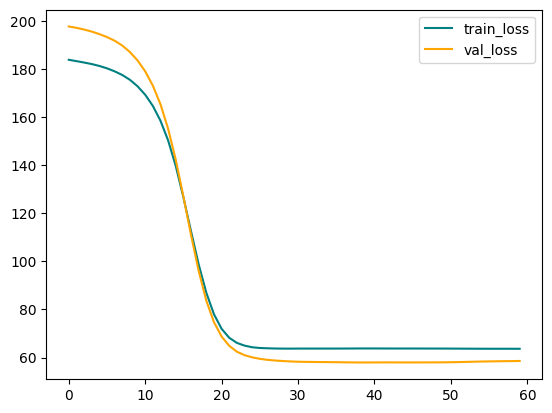

In [132]:
# Plotting loss
plt.plot(historyGRULSTM.history['loss'], color='teal', label='train_loss')
plt.plot(historyGRULSTM.history['val_loss'], color='orange', label='val_loss')
plt.legend(loc='best')
plt.show()

In [146]:
# Mix of layers
GRULSTM = keras.models.Sequential()
GRULSTM.add(keras.layers.GRU(units=50, kernel_initializer=initializer,
                             return_sequences=True))
GRULSTM.add(keras.layers.Dense(units=4, activation='linear'))
GRULSTM.build(input_shape=(None, times, variables))
GRULSTM.summary()

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_45 (GRU)                (None, 4, 50)             8850      
                                                                 
 dense_34 (Dense)            (None, 4, 4)              204       
                                                                 
Total params: 9,054
Trainable params: 9,054
Non-trainable params: 0
_________________________________________________________________


In [133]:
# Evaluating models
yhatLSTM = LSTM.predict(XTest)
yhatGRU = GRU.predict(XTest)
yhatMix = GRULSTM.predict(XTest)

1/1 [==============================] - 1s 838ms/step


In [124]:
# Selecting last period
yTestLastPeriod = yTest[:, 3]
yTestLastPeriod

array([[14.52565802],
       [12.80168403],
       [ 1.18843959],
       [32.685825  ],
       [ 7.15264946],
       [11.60808032],
       [ 4.82796561],
       [15.61333243],
       [ 7.8491147 ],
       [13.59304001],
       [21.28782059],
       [12.70326897],
       [10.79001914],
       [ 7.00747829],
       [10.22215405],
       [24.73270002],
       [ 6.29247925],
       [ 7.43190073],
       [ 6.82620169],
       [24.52904939],
       [11.9575333 ],
       [ 4.99750125],
       [ 2.27547147]])

In [134]:
# Evaluating
print(mean_squared_error(yTestLastPeriod, yhatLSTM),
     mean_squared_error(yTestLastPeriod, yhatGRU),
     mean_squared_error(yTestLastPeriod, yhatMix))

57.885973597379056 54.793351395947305 58.820445203048855


In [117]:
mean_squared_error(yTest[:, 3], yhatLSTM)

57.885973597379056

In [129]:
yhatMix

array([[[ 7.165336 ],
        [11.798469 ],
        [12.398928 ],
        [12.480305 ]],

       [[ 7.8959985],
        [11.89181  ],
        [12.411121 ],
        [12.481971 ]],

       [[ 8.379983 ],
        [11.943008 ],
        [12.41786  ],
        [12.48289  ]],

       [[ 8.36948  ],
        [11.942005 ],
        [12.417726 ],
        [12.482873 ]],

       [[ 7.6669116],
        [11.863161 ],
        [12.407516 ],
        [12.481478 ]],

       [[ 8.353369 ],
        [11.940346 ],
        [12.417512 ],
        [12.482843 ]],

       [[ 7.703493 ],
        [11.868992 ],
        [12.408151 ],
        [12.4815645]],

       [[ 8.322123 ],
        [11.937287 ],
        [12.417106 ],
        [12.482788 ]],

       [[ 7.7892766],
        [11.879182 ],
        [12.409489 ],
        [12.481748 ]],

       [[ 8.159129 ],
        [11.920599 ],
        [12.414907 ],
        [12.482488 ]],

       [[ 5.7581677],
        [11.562661 ],
        [12.367831 ],
        [12.476051 ]],

       [[ 